<a href="https://colab.research.google.com/github/AnujGavhane/Encryptix_taskno.3/blob/main/TASK_3_IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 3:IRIS FLOWER CLASSIFICATION
###Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements.

#IMPORTING IMPORTANT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTING DATASET

In [ ]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'],categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##CHECKING FOR NULL VALUES

In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###NO NULL VALUES.HENCE THE CAN VISUALISED EASILY



##3D Scatter Plot of Petal Length, Petal Width, and Species

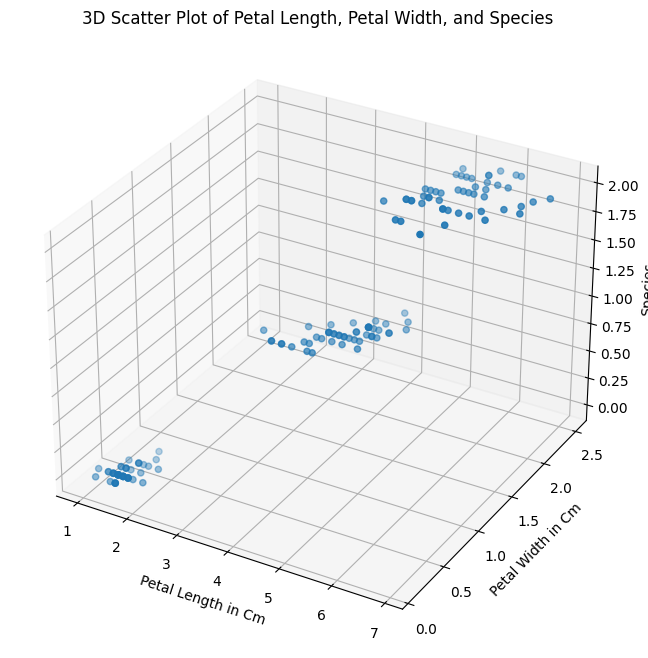

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('Petal Length in Cm')
ax.set_ylabel('Petal Width in Cm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot of Petal Length, Petal Width, and Species')
plt.show()


##3D Scatter Plot of Sepal Length, Sepal Width, and Species

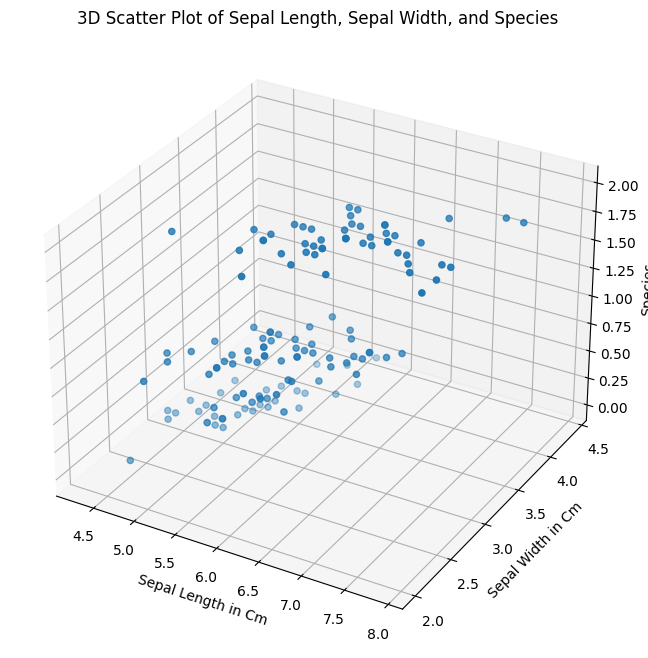

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('Sepal Length in Cm')
ax.set_ylabel('Sepal Width in Cm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot of Sepal Length, Sepal Width, and Species')
plt.show()

###Thus the species of Iris flower are more vaiable or distinct based on Petal Length and  Petal Width than Sepal Length and Sepal Width.

#2D Scatter Plot of Petal Length, Petal Width, and Species

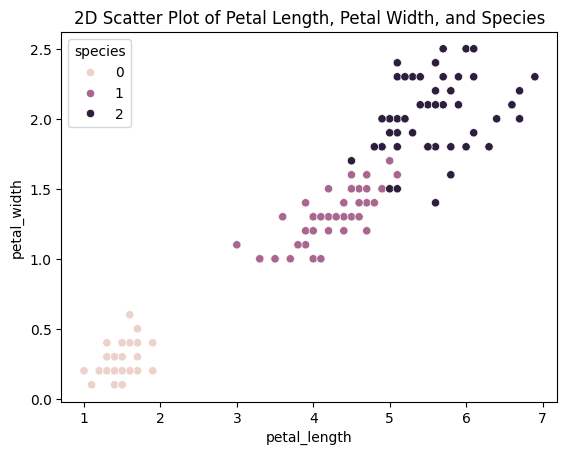

In [ ]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title('2D Scatter Plot of Petal Length, Petal Width, and Species')
plt.show()

##2D Scatter Plot of Sepal Length, Sepal Width, and Species

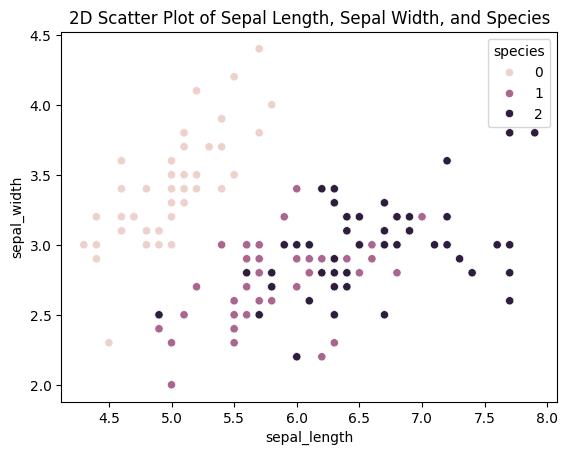

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('2D Scatter Plot of Sepal Length, Sepal Width, and Species')
plt.show()

##Applying Elbow Technique.

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_length','petal_width']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 19.499400899685114,
 13.933308757908755,
 11.103623662604786,
 9.25916314386097,
 7.828669607843139,
 6.472894541406307]

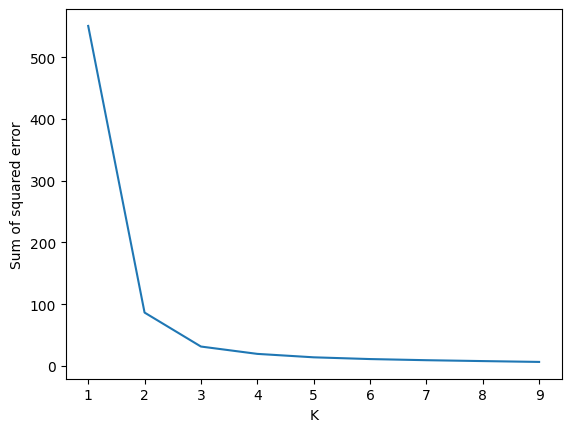

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

##Appling KMeans Clustering Algorithm

In [ ]:
km=KMeans(n_clusters=3,random_state=0)
y_predicted=km.fit_predict(df[['petal_length','petal_width']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


##Accuracy Measures

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(df['species'],df['cluster'])
print(cm)
print(accuracy_score(df['species'],df['cluster']))

[[50  0  0]
 [ 0  2 48]
 [ 0 46  4]]
0.37333333333333335


##Plot Confusion Matrix

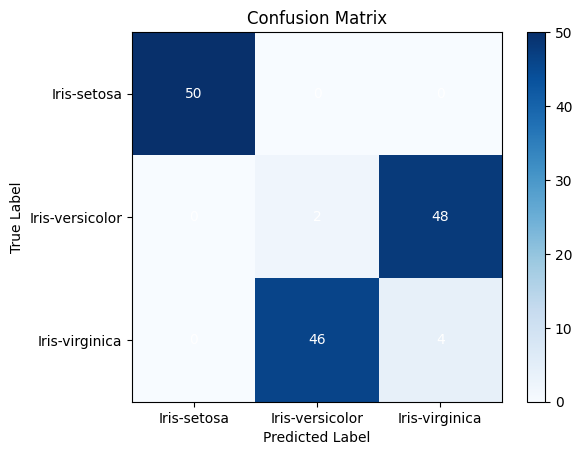

In [ ]:
true_labels = df['species']
predicted_labels = df['cluster']

cm = confusion_matrix(true_labels, predicted_labels)
class_labels=['Iris-setosa','Iris-versicolor','Iris-virginica'] # removed the ''

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center',color='white')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()